# Predictive Modeling with Linear Regression
---

This project focuses on building a predictive model using Linear Regression to analyze factors influencing a target variable, such as life expectancy. The workflow begins with loading and preprocessing a dataset, which includes handling missing values and encoding categorical variables for analysis. Feature selection techniques are employed to identify the most influential predictors related to the target variable. The model is then built using Python's scikit-learn and statsmodels libraries, assessing its performance through metrics like R2 score and Mean Squared Error. Diagnostic plots such as regression diagnostics and QQ plots provide insights into model validity and residuals. The project also supports predictions based on user-provided input data, illustrating practical applications of statistical modeling in various domains.

## Setting Up Environment

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import  LabelEncoder
import statsmodels.api as sm 

## Loading Dataset

In [28]:
def load_data(file_path):
    return pd.read_csv(file_path)

## Preprocessing Data

In [29]:
def preprocess_data(df):
    df.fillna(method='ffill', inplace=True)
    
    label_encoders = {}  
    
    for column in df.select_dtypes(include=['object']).columns:
        unique_values = list(set(df[column]))
        value_to_int = {value: idx for idx, value in enumerate(unique_values)}
        
        label_encoders[column] = value_to_int
        
        df[column] = df[column].map(value_to_int)
    
    print(df.describe())
    
    return df, label_encoders

Handling Missing Data

In [30]:
def impute_values(null_columns, df):
    for col in null_columns:
        if df[col].dtype == 'object':
            df[col].fillna('Unknown', inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)
        
        return df

## Feature Selection

In [31]:
def feature_selection(df, target_column):
    correlations = df.corr()
    
    target_corr = correlations[target_column].sort_values(ascending=False)

    print(target_corr)
    
    plt.figure(figsize=(12, 12))
    sns.heatmap(correlations, annot=True, cmap='Blues')
    plt.show()
    
    print("Top 3 features correlated with target:")
    top_features = target_corr[1:4]
    for feature, corr_value in top_features.items():
        print(f"{feature}: {corr_value}")
    
    return target_corr.index[1:4]

## Plot Regression

In [32]:
def plot_regression_diagnostics(Y_test, Y_pred, model):
    residuals = Y_test - Y_pred
    
    plt.figure(figsize=(18, 8))
    
    plt.figure(figsize=(10, 6))
    plt.scatter(Y_test, Y_pred, alpha=0.7)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values')
    plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red')
    plt.show()

    residuals = Y_test - Y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(Y_pred, residuals, alpha=0.7)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Predicted Values')
    plt.axhline(y=0, color='red')
    plt.show()

    
    plt.figure(figsize=(10, 6))
    plt.hist(residuals, bins=30)
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title("Histogram of Residuals")
    
    plt.tight_layout()
    plt.show()

## Model Building

In [33]:
def fit_and_predict(df, target_column, features):
    X = df[features]
    y = df[target_column]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    print(f"METRICS :: ")
    print(f"R^2 Score: {r2_score(y_test, y_pred)}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
    print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}')

    coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
    print(f"\n\nModel coefficients :: \n{coefficients}")

    print(f'\n\nModel Intercept :: {model.intercept_}')
    
    plot_regression_diagnostics(y_test, y_pred, model)

    return model, coefficients, model.intercept_

## Predict by user input

In [34]:
def collect_input_features(features, label_encoders):
    new_data = pd.DataFrame(columns=features)
    
    for feature in features:
        value = input(f"Enter value for {feature}: ")
        
        if feature in label_encoders:
            if value in label_encoders[feature]:
                encoded_value = label_encoders[feature][value]
            else:
                raise ValueError(f"Value '{value}' for feature '{feature}' not found in label encoders.")
            new_data[feature] = [encoded_value]
        else:
            new_data[feature] = [float(value)]
    
    return new_data

In [35]:
def predict_with_model(model, new_data):
    predicted_value = model.predict(new_data)
    return predicted_value

## Example Usage

In [36]:
file_path = 'Life Expectancy Data.csv'

In [37]:
df = load_data(file_path)

In [38]:
target_column = 'LifeExpectancy'

In [39]:
null_columns = df.columns[df.isnull().any()]
if len(null_columns)>0:
    df = impute_values(null_columns, df)

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_19304\1388565173.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


C:\Users\PMYLS\AppData\Local\Temp\ipykernel_19304\2720629994.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


           Country         Year       Status  LifeExpectancy  AdultMortality  \
count  2938.000000  2938.000000  2938.000000     2938.000000     2938.000000   
mean     95.627297  2007.518720     0.174268       69.234717      164.816542   
std      56.173975     4.613841     0.379405        9.509115      124.433748   
min       0.000000  2000.000000     0.000000       36.300000        1.000000   
25%      46.000000  2004.000000     0.000000       63.200000       74.000000   
50%      97.000000  2008.000000     0.000000       72.100000      144.000000   
75%     145.000000  2012.000000     0.000000       75.600000      228.000000   
max     192.000000  2015.000000     1.000000       89.000000      723.000000   

       infantDeaths      Alcohol  percentageExpenditure   HepatitisB  \
count   2938.000000  2938.000000            2938.000000  2938.000000   
mean      30.303948     4.607270             738.251295    75.683799   
std      117.926501     4.044785            1987.914858    28.8

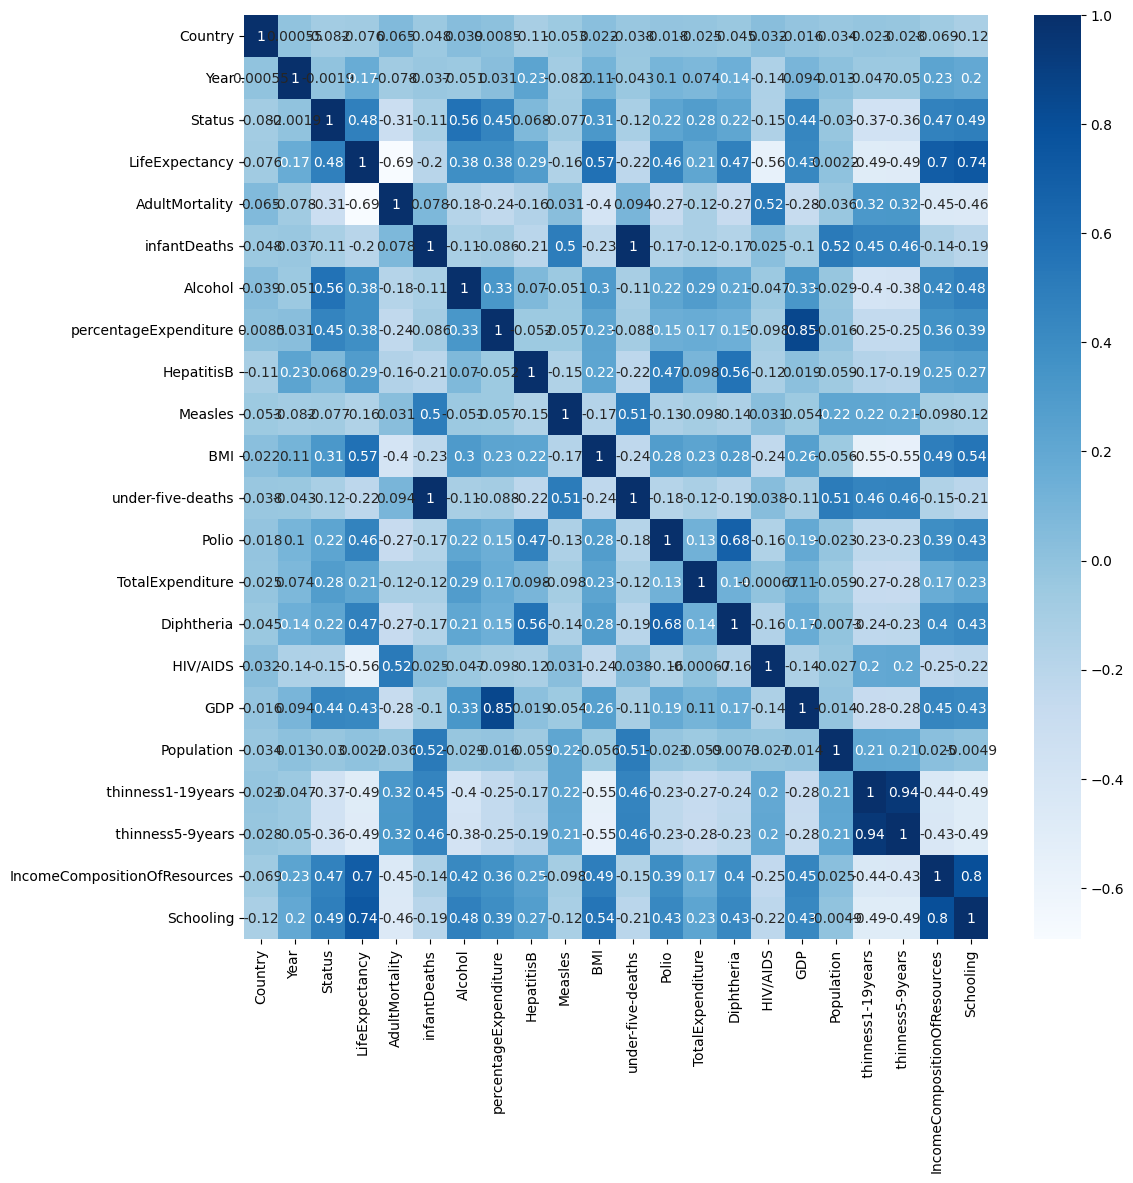

Top 3 features correlated with target:
Schooling: 0.7361858336702474
IncomeCompositionOfResources: 0.7037131275947731
 BMI: 0.5738591243485263


In [40]:
df, labelsEncoded = preprocess_data(df)
features = feature_selection(df, target_column)

## Fitting the model

METRICS :: 
R^2 Score: 0.6480443731275427
Mean Squared Error: 30.503066885293396
Root Mean Squared Error: 5.522958164362048


Model coefficients :: 
                              Coefficient
Schooling                        1.039075
IncomeCompositionOfResources    14.141449
 BMI                             0.104830


Model Intercept :: 43.85393407664411


<Figure size 1800x800 with 0 Axes>

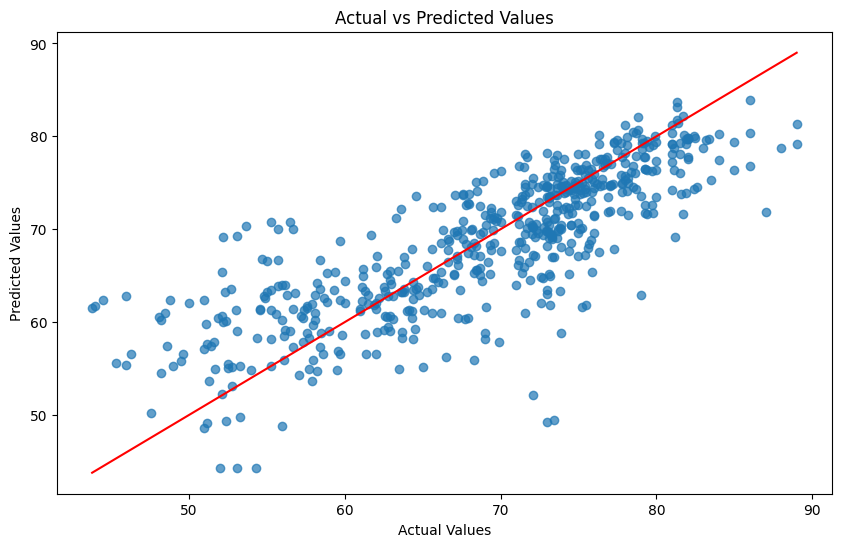

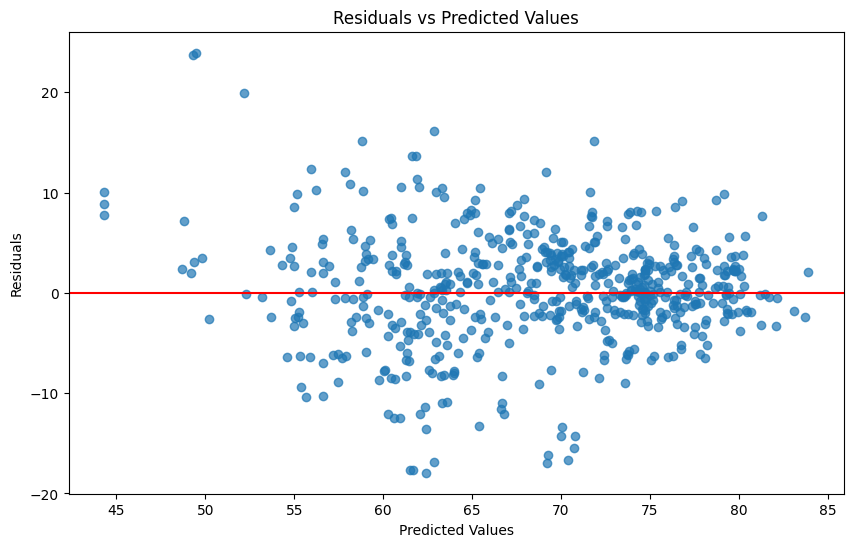

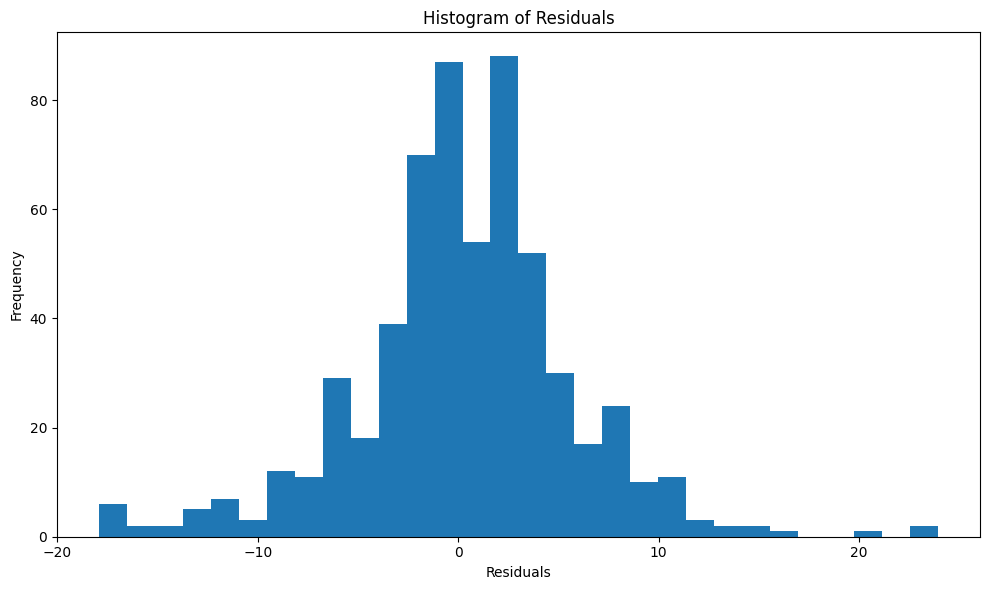

In [41]:
model, coeffs, intercept  = fit_and_predict(df, target_column, features)

## Predictions

Input Features

In [42]:
new_data = collect_input_features(features, labelsEncoded)

In [43]:
new_data_prediction = model.predict(new_data)
print(f"Prediction of {target_column} for new data:", new_data_prediction)

Prediction of LifeExpectancy for new data: [70.95276624]
